# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Review all the figures and tables that you generated in this assignment.  
# Write at least three observations or inferences that can be made from the data. 

# First Observation: Capomulin and Ramicane are the most effective drug regimens in reducing tumor volume. 
# They have the lowest mean tumor volumes and display a more consistent response among mice 
# (lower variance and standard deviation).

# Second Observation: Capomulin and Ramicane are the most frequently administered drug regimens in the study. 
# Additionally, there is a balanced gender distribution among the subjects (males 51% and females 49%).

# Third Observation: In the case of mouse l509 treated with Capomulin, the tumor volume initially increased until day 20 
# but then exhibited a significant decrease between days 20 and 35, followed by a slight rebound.

# Fourth Observation: There is a strong positive correlation (correlation coefficient = 0.84) 
# between mouse weight and average tumor volume, suggesting that an increase in weight is associated 
# with an increase in tumor volume.



In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [3]:
# Studying data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Reading the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
# Combining the data into a single DataFrame
mice_tumor_study = pd.merge(study_results, mouse_metadata,  on="Mouse ID")

# Displaying the data table for preview
mice_tumor_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [5]:
# Checking the number of mice.
mice_tumor_study["Mouse ID"].nunique()

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = mice_tumor_study[mice_tumor_study.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicated_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Optional: Getting all the data for the duplicate mouse ID. 
duplicated_mouse = mice_tumor_study.loc[mice_tumor_study['Mouse ID'] == "g989"]
duplicated_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Creating a clean DataFrame by dropping the duplicate mouse by its ID.
mice_tumor_study = mice_tumor_study.loc[mice_tumor_study['Mouse ID'] != "g989"]

In [9]:
# Checking the number of mice in the clean DataFrame.
mice_tumor_study["Mouse ID"].nunique()

248

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

mice_tumor_study_grouped= mice_tumor_study.groupby(["Drug Regimen"])
mice_tumor_study_grouped

In [11]:
# Calculating mean, median, variance, standard deviation, and SEM of the tumor volume. 
mice_tumor_study_mean = mice_tumor_study_grouped[['Tumor Volume (mm3)']].mean()
mice_tumor_study_median = mice_tumor_study_grouped[['Tumor Volume (mm3)']].median()
mice_tumor_study_variance = mice_tumor_study_grouped[['Tumor Volume (mm3)']].var()
mice_tumor_study_std = mice_tumor_study_grouped[['Tumor Volume (mm3)']].std()
mice_tumor_study_sem = mice_tumor_study_grouped[['Tumor Volume (mm3)']].sem()

# Assembling the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({"Mean Tumor Volume" : mice_tumor_study_mean['Tumor Volume (mm3)'] ,
                                   "Median Tumor Volume" : mice_tumor_study_median['Tumor Volume (mm3)'],
                                   "Tumor Volume Variance" : mice_tumor_study_variance['Tumor Volume (mm3)'],
                                   "Tumor Volume Std. Dev." : mice_tumor_study_std['Tumor Volume (mm3)'],
                                   "Tumor Volume Std. Err." : mice_tumor_study_sem['Tumor Volume (mm3)'],
       
})
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [14]:
# Preparing the DataFrame that will be used to create a bar plot - using count() function, renaming columns and sorting values
usage_by_drug = mice_tumor_study_grouped[["Drug Regimen"]].count()
usage_by_drug = usage_by_drug.rename(columns={"Drug Regimen":"Counts"})
sorted_usage_by_drug = usage_by_drug.sort_values("Counts", ascending=False)
sorted_usage_by_drug

,Counts
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


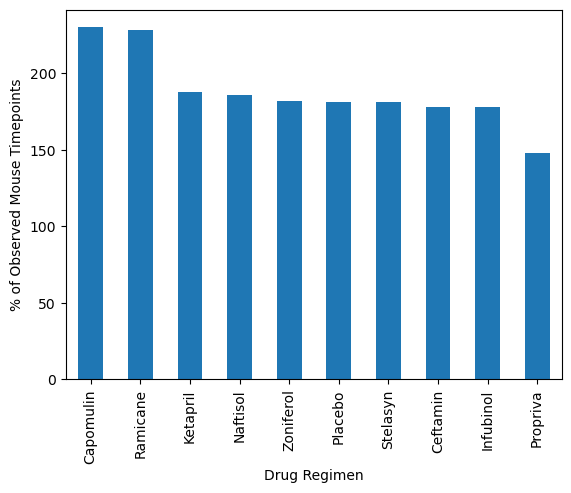

<Figure size 640x480 with 0 Axes>

In [15]:
# Generating a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_usage = sorted_usage_by_drug.plot(kind="bar", legend = False)
drug_usage.set_xlabel("Drug Regimen")
drug_usage.set_ylabel("% of Observed Mouse Timepoints")

plt.show()
plt.tight_layout()


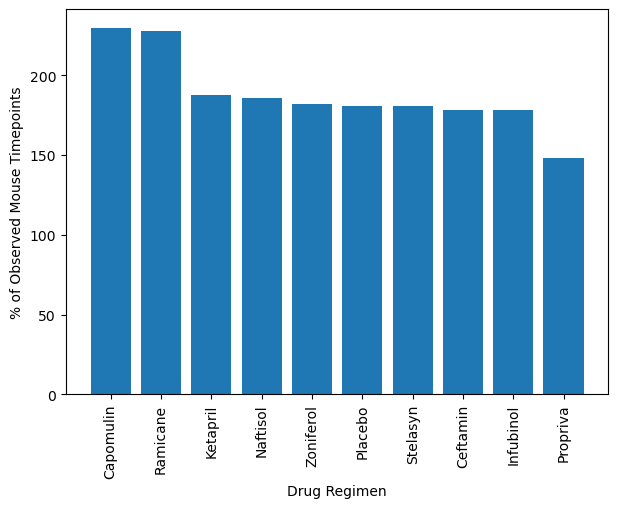

In [16]:
# Generating a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

usage_by_drug_ungrouped = sorted_usage_by_drug.reset_index()
x_axis = np.arange(len(usage_by_drug_ungrouped))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(7,5))
plt.bar(x_axis, usage_by_drug_ungrouped["Counts"], color='#1f77b4', align="center")
plt.xticks(tick_locations, usage_by_drug_ungrouped["Drug Regimen"], rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("% of Observed Mouse Timepoints")
plt.show()


In [17]:
# Using groupy function to count the number of males and females
sex_distribution_grouped = mice_tumor_study.groupby("Sex")
sex_distribution_counted = sex_distribution_grouped[["Sex"]].count()
sex_distribution_counted = sex_distribution_counted.rename(columns={"Sex":"Counts"})
sex_distribution_sorted = sex_distribution_counted.sort_values("Sex", ascending = False)

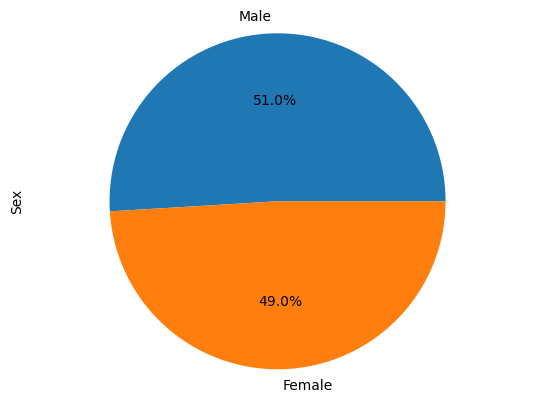

In [18]:
# Generating a pie plot showing the distribution of female versus male mice using Pandas
sex_distribution = sex_distribution_sorted.plot(kind="pie", y="Counts", legend = False, autopct="%1.1f%%",)
sex_distribution.set_ylabel("Sex")
plt.axis("equal")

plt.show()

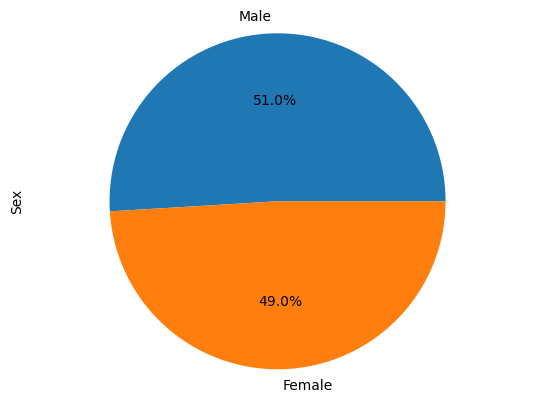

In [19]:
# Resetting the index
sex_distribution_ungrouped = sex_distribution_sorted.reset_index()
# Generating a pie plot showing the distribution of female versus male mice using pyplot
sizes = sex_distribution_ungrouped["Counts"]
labels = sex_distribution_ungrouped["Sex"]
colours = ["#1f77b4", "#ff7f0e"]
plt.pie(sizes, labels=labels, colors=colours, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()



## Quartiles, Outliers and Boxplots

In [20]:
# Calculating the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Starting by getting the last (greatest) timepoint for each mouse
grouped_by_mouse_id = mice_tumor_study.groupby("Mouse ID")
max_timepoints_by_mouse = grouped_by_mouse_id[["Timepoint"]].max().reset_index()

# Merging this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume_at_last_timepoint = pd.merge(max_timepoints_by_mouse, mice_tumor_study, on=["Mouse ID", "Timepoint"]  )
tumor_volume_at_last_timepoint.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [21]:
# Putting treatments into a list for for loop (and later for plot labels)

treatment_names = [ "Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Creating empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Locating the rows which contain mice on each drug and get the tumor volumes
for treatment in treatment_names:
    tumor_volumes = tumor_volume_at_last_timepoint.loc[tumor_volume_at_last_timepoint['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_volume_data.append(tumor_volumes)
 
    # Calculating the IQR and quantitatively determine if there are any potential outliers.
    quartiles = tumor_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
     #Determining outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    print(f"{treatment}'s potential outliers: {outliers}")  
    
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


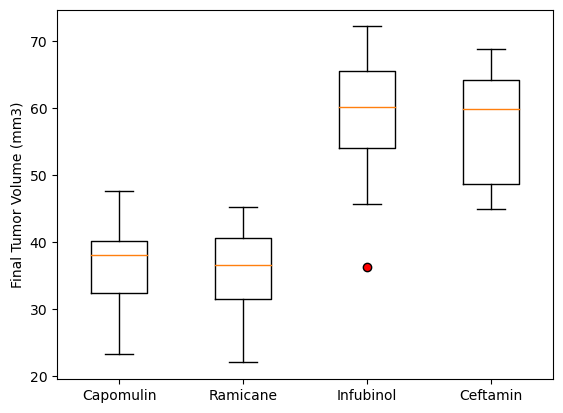

In [22]:
# Indicating the tumor volumes per drug
tumor_volumes_capomulin = [38.98287774, 38.93963263, 30.48598484, 37.07402422, 40.1592203, 47.68596303, 37.31184577, 38.1251644, 38.75326548, 41.48300765, 38.84687569, 28.43096411, 33.32909778, 46.53920617, 32.37735684, 41.58152074, 23.34359787, 40.72857787, 34.45529799, 31.02392294, 40.65812366, 39.95234669, 36.04104736, 28.48403281, 31.8962384]
tumor_volumes_ramicane = [38.4076183, 43.0475426, 38.81036633, 32.97852192, 38.34200823, 33.39765251, 37.31123552, 40.65900627, 29.12847181, 33.56240217, 36.37451039, 31.56046955, 36.13485243, 22.05012627, 30.56462509, 31.09533505, 45.22086888, 36.56165229, 37.22565033, 43.41938077, 30.27623175, 40.66771292, 43.16637266, 44.18345092, 30.63869575]
tumor_volumes_infubinol =  [67.97341878, 65.52574285, 57.03186187, 66.08306589, 72.2267309, 36.3213458, 60.96971133, 62.43540402, 60.91876652, 67.28962147, 66.19691151, 62.11727887, 47.01036401, 60.16518046, 55.62942846, 45.69933088, 54.65654872, 55.65068132, 46.25011212, 54.04860769, 51.54243058, 50.00513807, 58.26844248, 67.68556862, 62.75445141]
tumor_volumes_ceftamin = [62.99935619, 45.0, 56.05774909, 55.74282869, 48.72207785, 47.7846818, 61.84902336, 68.92318457, 67.74866174, 57.91838132, 46.78453491, 59.85195552, 64.29983003, 59.74190064, 61.43389223, 64.19234114, 45.0, 52.92534846, 45.0, 67.52748237, 45.0, 64.63494887, 61.38666032, 68.59474498, 64.72983655]


tumor_volumes_4drugs = [tumor_volumes_capomulin, tumor_volumes_ramicane,  tumor_volumes_infubinol, tumor_volumes_ceftamin]

# Generating a box plot that shows the distribution of the final tumor volume for all the mice in each treatment group
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_volumes_4drugs, labels =[ "Capomulin", "Ramicane", "Infubinol", "Ceftamin"],flierprops={'marker': 'o', 'markerfacecolor': 'red'})
plt.show()

## Line and Scatter Plots

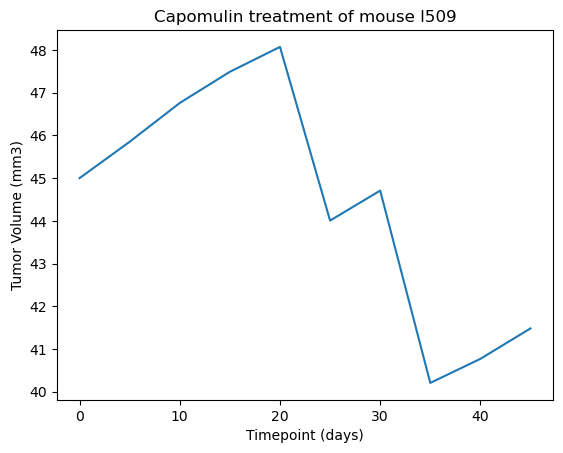

In [23]:
# Filtering by mouse "I509"
mouse_I509 = mice_tumor_study.loc[mice_tumor_study["Mouse ID"] == "l509", ["Timepoint", "Tumor Volume (mm3)"]]


# Generating a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.plot(mouse_I509["Timepoint"], mouse_I509["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

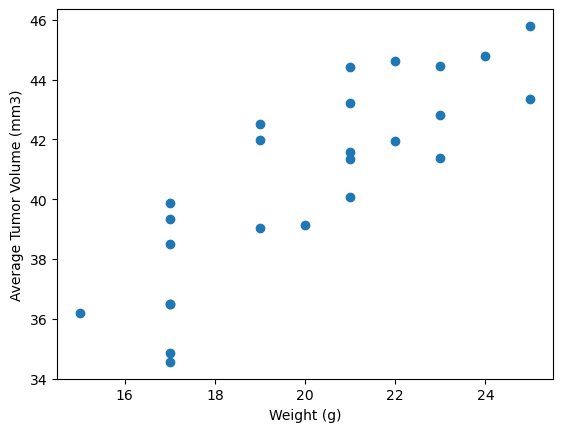

In [24]:
# Filtering by drug "Capomulin"
capomulin_regimen = mice_tumor_study.loc[mice_tumor_study["Drug Regimen"] == "Capomulin"]


# Grouping data by 'Mouse ID' within the 'Capomulin' treatment group to analyze the weights of mice according to their IDs.
capomulin_grouped = capomulin_regimen.groupby("Mouse ID")
capomulin_weight = capomulin_grouped['Weight (g)'].unique().reset_index()
capomulin_weight["Weight (g)"] = capomulin_weight["Weight (g)"].astype(float)

# Grouping data by 'Mouse ID' within the 'Capomulin' treatment group to analyze the average tumor volumes of mice 
# according to their IDs.
capomulin_tumor_grouped = capomulin_regimen.groupby("Mouse ID")
capomulin_average_tumor_vol = capomulin_tumor_grouped[["Tumor Volume (mm3)"]].mean().reset_index()


# Generating a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(capomulin_weight["Weight (g)"],capomulin_average_tumor_vol["Tumor Volume (mm3)"]  )
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


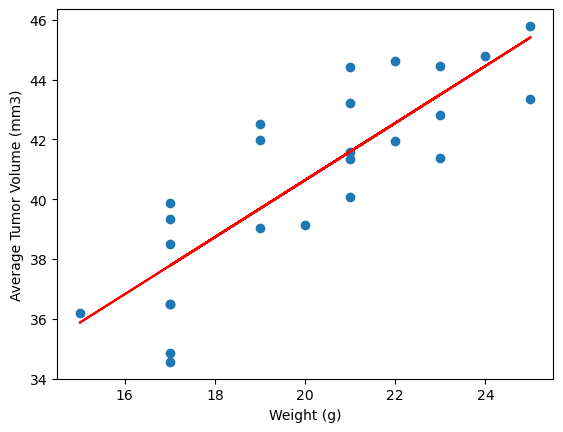

In [27]:
# Calculating the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

x_values = capomulin_weight["Weight (g)"]
y_values = capomulin_average_tumor_vol["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between mouse weight and the average tumor volume is: {round(correlation[0],2)}")
plt.show()

